In [9]:
import os

import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

import src.visualization as vs
import src.json_cleaning as jc


In [10]:
data = pd.read_csv('data/raw/kickstarter.csv')
data.shape

(209222, 37)

In [11]:
# convert goal with static_usd_rate, drop both afterwards and keep converted goal
def goal_convert(df):
    df['converted_goal'] = (df['goal'].mul(df['static_usd_rate'])).round(2)
    df['usd_pledged'] = df['usd_pledged'].round(2)
    df.drop(['goal','static_usd_rate'], axis =1, inplace = True)
    return df

data = goal_convert(data)

data.shape

(209222, 36)

In [12]:
# 'blurb' and 'name' to len()
def string_length(df):
    df['len_blurb'] = df['blurb'].str.split().str.len()
    df['len_name'] = df['name'].str.split().str.len()
    df.drop(['blurb', 'name'], axis = 1, inplace = True)
    return df

data = string_length(data)

data.shape

(209222, 36)

In [13]:
# created and launch time windows
date_columns = ['created_at','deadline','launched_at']

# for column in date_columns:
#     data[column] = data[column].apply(dt.datetime.fromtimestamp)

launch_to_deadline = (data['deadline'] - data['launched_at'])
creation_to_launch = (data['launched_at'] - data['created_at'])

data['launch_to_deadline'] = launch_to_deadline
data['creation_to_launch'] = creation_to_launch

data['month'] = pd.to_datetime(data['launched_at'], unit='s').dt.month_name()
data['weekday'] = pd.to_datetime(data['launched_at'], unit='s').dt.day_name()
data['day_hour'] = pd.to_datetime(data['launched_at'], unit='s').dt.hour

data.drop(date_columns, axis=1, inplace=True)

# launch_to_deadline_days = launch_to_deadline.dt.days
# launch_to_deadline_minutes = launch_to_deadline.dt.seconds // 60

# creation_to_launch_days = creation_to_launch.dt.days
# creation_to_launch_minutes = creation_to_launch.dt.seconds // 60

# time_df = pd.concat([launch_to_deadline_days, launch_to_deadline_minutes,
#                      creation_to_launch_days, creation_to_launch_minutes],
#                     axis=1,
#                     keys = ['launch_to_deadline_days', 'launch_to_deadline_minutes',
#                             'creation_to_launch_days', 'creation_to_launch_minutes'])

In [14]:
data.columns

Index(['backers_count', 'category', 'converted_pledged_amount', 'country',
       'creator', 'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'disable_communication', 'friends', 'fx_rate', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'location', 'permissions',
       'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'urls', 'usd_pledged',
       'usd_type', 'converted_goal', 'len_blurb', 'len_name',
       'launch_to_deadline', 'creation_to_launch', 'month', 'weekday',
       'day_hour'],
      dtype='object')

In [7]:
def get_first_part(entry):
    return entry.split('/')[0]

In [15]:
# convert category vars to categories
col = ['category']
data = jc.json_cleaning(data, col)
#data.drop(['category_#slug','category_id'], axis=1, inplace=True)

data.shape

(209222, 39)

In [16]:
data.head()

,backers_count,converted_pledged_amount,country,creator,currency,currency_symbol,currency_trailing_code,current_currency,disable_communication,friends,...,converted_goal,len_blurb,len_name,launch_to_deadline,creation_to_launch,month,weekday,day_hour,category_name,category_slug
0,315,28645,US,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,False,NaN,...,28000.00,2.0,3,4316400,6764170,January,Wednesday,6,Footwear,fashion/footwear
1,47,1950,US,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,False,NaN,...,1000.00,22.0,4,2592000,700366,August,Thursday,17,Playing Cards,games/playing cards
2,271,22404,US,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,False,NaN,...,15000.00,15.0,7,2592000,19433862,May,Monday,5,Rock,music/rock
3,3,165,GB,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,False,NaN,...,12160.66,23.0,8,5180400,465105,January,Thursday,18,Playing Cards,games/playing cards
4,3,2820,US,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,False,NaN,...,2800.00,24.0,7,2592000,354456,December,Monday,20,Nonfiction,publishing/nonfiction


In [18]:
data['parent_category'] = data['category_slug'].apply(get_first_part)
data.head()

,backers_count,converted_pledged_amount,country,creator,currency,currency_symbol,currency_trailing_code,current_currency,disable_communication,friends,...,len_blurb,len_name,launch_to_deadline,creation_to_launch,month,weekday,day_hour,category_name,category_slug,parent_category
0,315,28645,US,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,False,NaN,...,2.0,3,4316400,6764170,January,Wednesday,6,Footwear,fashion/footwear,fashion
1,47,1950,US,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,False,NaN,...,22.0,4,2592000,700366,August,Thursday,17,Playing Cards,games/playing cards,games
2,271,22404,US,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,False,NaN,...,15.0,7,2592000,19433862,May,Monday,5,Rock,music/rock,music
3,3,165,GB,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,False,NaN,...,23.0,8,5180400,465105,January,Thursday,18,Playing Cards,games/playing cards,games
4,3,2820,US,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,False,NaN,...,24.0,7,2592000,354456,December,Monday,20,Nonfiction,publishing/nonfiction,publishing


In [19]:
# drop everything that isn't successful or failed
data = data.query('state == "successful" | state == "failed" ')
data.state = data.state.apply(lambda x: 0 if 'failed' in x else 1)

data.shape

(192664, 40)

In [20]:
def drop_duplicates(dataframe):
    # Identify the duplicated rows based on the "id" column
    duplicate_mask = dataframe.duplicated('id').copy()

    # Select the rows that are not duplicates and do not have "domestic" as the value in the "usd_type" column
    dataframe = dataframe[~((duplicate_mask) & (dataframe['usd_type'] == 'domestic'))]
    
    # Drop the rows that are duplicates based on the "id" column, keeping only the first occurrence of each group
    dataframe.drop_duplicates('id', keep='first', inplace=True)

    # Return the resulting DataFrame
    return dataframe

data = drop_duplicates(data)

/Users/simonkroll/Documents/datascience/ds-linear-regression/.venv/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [23]:
data.columns

Index(['backers_count', 'converted_pledged_amount', 'country', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'disable_communication', 'friends', 'fx_rate', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'location', 'permissions',
       'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'urls', 'usd_pledged',
       'usd_type', 'converted_goal', 'len_blurb', 'len_name',
       'launch_to_deadline', 'creation_to_launch', 'month', 'weekday',
       'day_hour', 'category_name', 'category_slug', 'parent_category'],
      dtype='object')

In [24]:
drop_these = [
    'converted_pledged_amount',
    'currency',
    'currency_symbol',
    'currency_trailing_code',
    'current_currency',
    'disable_communication',
    'friends',
    'fx_rate',
    'id',
    'is_backing',
    'is_starrable',
    'is_starred',
    'permissions',
    'pledged',
    'slug',
    'source_url',
    'spotlight',
    'state_changed_at',
    'urls',
    ]

drop_these_too = [
    'creator',
    'location',
    'photo',
    'profile', 'category_slug'
]

data.drop(drop_these, axis=1, inplace=True)
data.drop(drop_these_too, axis=1, inplace=True)

In [25]:
vs.nice_summary(data)

# sns.histplot(data=time_df, x='launch_to_deadline')

# it looks like projects can be created but not immediately launched
# once a project is launched there is a maximum funding time of 93 days (3 months)

# when do people launch their projects?
# when are they more likely to postpone the launch?

,Columns,Dtype,nunique,Non-Null Count,Missing,Missing %,Zero Count,mean,std,min,25%,50%,75%,max
0,backers_count,int64,3206,168979,-,-,14821,140.07,894.93,0.0,3.0,25.0,85.0,105857.0
1,country,object,22,168979,-,-,0,-,-,-,-,-,-,-
2,staff_pick,bool,2,168979,-,-,147323,-,-,-,-,-,-,-
3,state,int64,2,168979,-,-,74200,0.56,0.5,0.0,0.0,1.0,1.0,1.0
4,usd_pledged,float64,69802,168979,-,-,14821,12110.97,83739.29,0.0,100.0,1457.0,6235.0,8596474.58
5,usd_type,object,2,168959,20,0.01,0,-,-,-,-,-,-,-
6,converted_goal,float64,45238,168979,-,-,0,41096.88,1110956.93,0.01,1500.0,5000.0,13297.7,152350076.0
7,len_blurb,float64,35,168977,2,-,0,19.01,4.98,1.0,16.0,20.0,22.0,35.0
8,len_name,int64,20,168979,-,-,0,5.71,2.71,1.0,4.0,6.0,8.0,27.0
9,launch_to_deadline,int64,47963,168979,-,-,0,2821257.19,1015877.11,86400.0,2588400.0,2592000.0,2948818.5,8044324.0


In [26]:
data.to_csv(os.path.join('data/processed/', 'kickstarter_clean.csv'), index=False)

<AxesSubplot:xlabel='state', ylabel='count'>

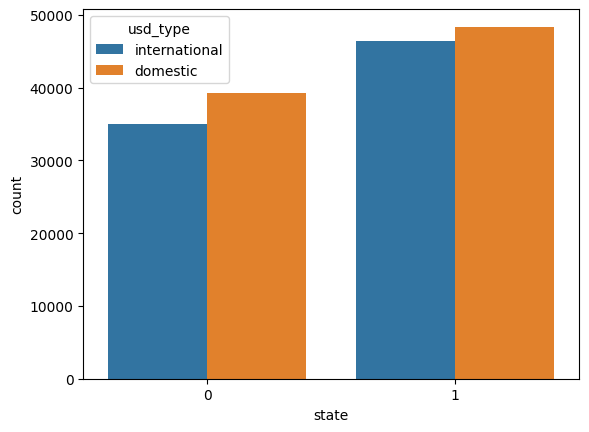

In [262]:
sns.countplot(data=data, x='state', hue='usd_type')

In [263]:
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in time_df.columns.tolist():
    plt.subplot(5,2,i)
    sns.boxplot(data=time_df, x=name)
    i = i + 1

NameError: name 'time_df' is not defined

<Figure size 2000x3000 with 0 Axes>

In [ ]:
# KEEP ONLY SUCCESSFUL AND FAILED (otherwise comparing apples and pears (:  )

display(data.query('pledged >= goal and state == False').groupby('state').state.count())
display(data.query('pledged <= goal and spotlight == True').groupby('state').state.count())
display(data.groupby('state').state.count())
display(data.groupby('state').state.count())

UndefinedVariableError: name 'pledged' is not defined

<AxesSubplot:xlabel='state', ylabel='count'>

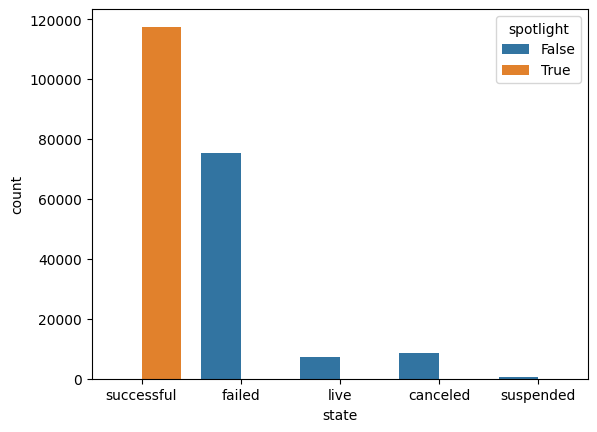

In [ ]:
sns.countplot(data=data, x='state', hue='spotlight')

In [ ]:
data.query('state=="live"')['state'].count()

7311